# Exercise - Audio Processing

**Nama:** A. Edwin Krisandika Putra  
**NIM:** 122140003  
**Mata Kuliah:** Sistem & Teknologi Multimedia  
[Repository Github](https://github.com/aloisiusedwin/Multimedia)   

---

### Soal 1
- Rekamlah suara Anda sendiri selama 25 detik dimana anda membaca sebuah teks berita.
- Dalam 25 detik rekaman tersebut, anda harus merekam:
    - 5 detik pertama: suara sangat pelan dan berbisik
    - 5 detik kedua: suara normal
    - 5 detik ketiga: suara keras
    - 5 detik keempat: suara cempreng (dibuat-buat cempreng)
    - 5 detik terakhir: suara berteriak
- Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Visualisasikan waveform dan spektogram dari rekaman suara anda
- Sertakan penjelasan singkat mengenai hasil visualisasi tersebut.
- Lakukan resampling pada file audio anda kemudian bandingkan kualitas dan durasinya.

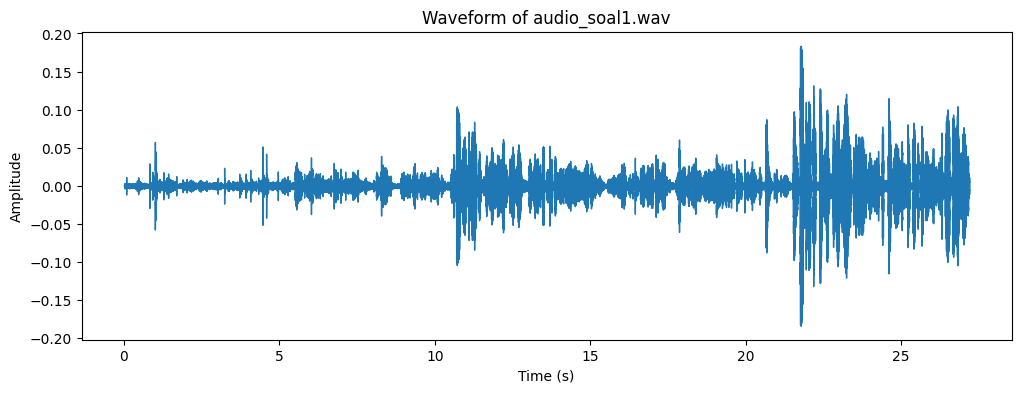

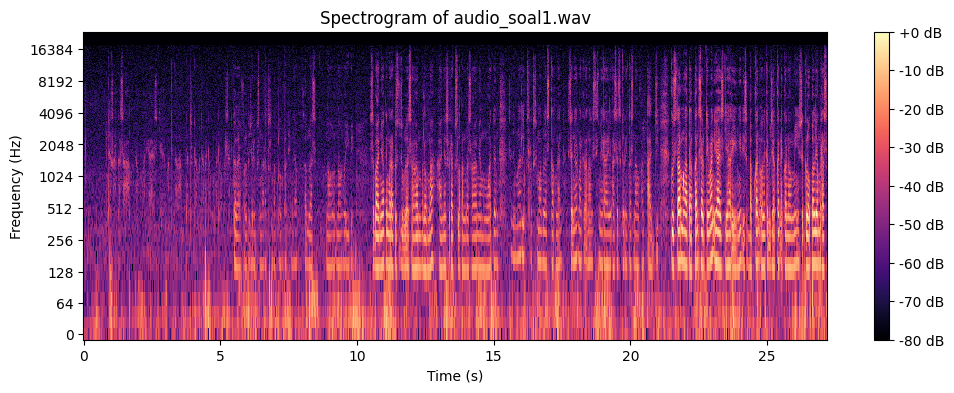

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_file = os.path.join('data', 'audio_soal1.wav')
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of audio_soal1.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of audio_soal1.wav')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Penjelasan : Pada plot waveform dapat terlihat perbedaan dari suara berbisik, suara normal dan suara lainnya. Pada suara berbisik terlihat amplitudo nya mendekati nilai 0 tapi tidak rata dengan 0 yang menandakan suara kecil tapi masih dapat terdengar. Pada suara normal terlihat amplitudo juga masih biasa saja tapi terlihat lebih keras (amplitudo lebih jauh dari 0). Suara keras dan suara teriak juga terlihat amplitudo nya lebih tinggi menandakan suara memiliki volume lebih keras. Pada plot spektogram, terlihat suara berbisik tidak terlalu mencolok dan memiliki warna yang tidak begitu terang di vokal manusianya. Pada suara normal terlihat lebih terang karena suara lebih terdengar. Pada suara cempreng, frekuensi menonjol dari frekuensi tengah sampai tinggi. Pada suara keras dan berteriak terlihat kalau warnanya lebih terang menandakan suara terdengar lebih keras dari yang lain.

Original Sampling Rate: 48000 Hz, Duration: 27.20 seconds
Resampled Sampling Rate: 16000 Hz, Duration: 27.20 seconds
Resampled audio saved to: data\audio_soal1_resampled.wav


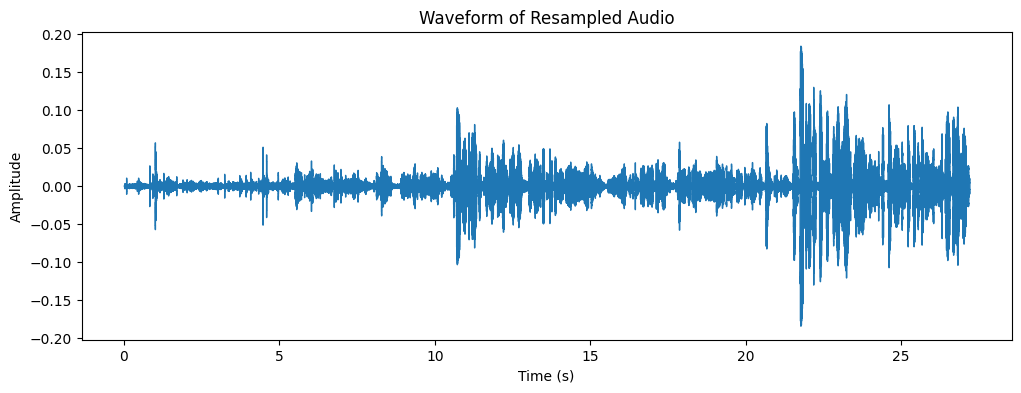

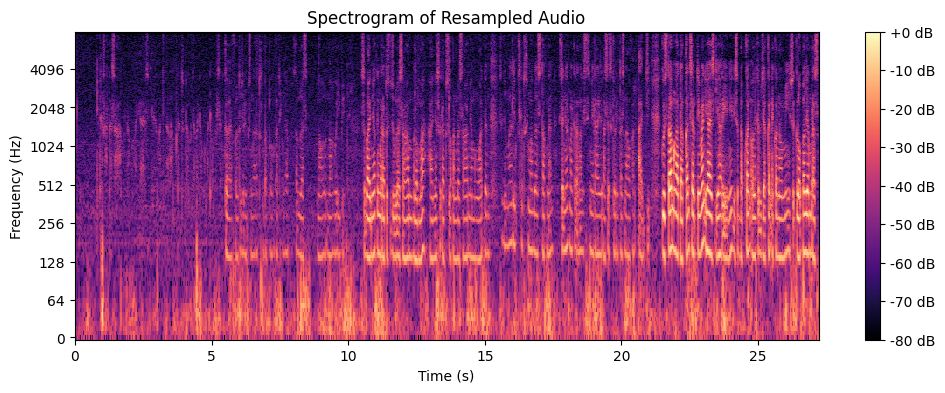

In [2]:
# Resample the audio to a lower sampling rate
target_sr = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

# Print the original and resampled durations
original_duration = len(y) / sr
resampled_duration = len(y_resampled) / target_sr

print(f"Original Sampling Rate: {sr} Hz, Duration: {original_duration:.2f} seconds")
print(f"Resampled Sampling Rate: {target_sr} Hz, Duration: {resampled_duration:.2f} seconds")

# Save the resampled audio to a file
import soundfile as sf
resampled_audio_file = os.path.join('data', 'audio_soal1_resampled.wav')
sf.write(resampled_audio_file, y_resampled, target_sr)
print(f"Resampled audio saved to: {resampled_audio_file}")

# Plot the waveform of the resampled audio
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title('Waveform of Resampled Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram of the resampled audio
D_resampled = librosa.amplitude_to_db(np.abs(librosa.stft(y_resampled)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D_resampled, sr=target_sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Resampled Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Penjelasan : Audio asli memiliki sample rate yaitu 48000Hz, pada kode di atas, audio di resample lebih tepatnya downsampling karena menurunkan sample ratenya jadi 16000Hz. Hal ini membuat kualitas audio menurun karena memotong/menurunkan frekuensi yang disimpan, jadi rangenya lebih terbatas karena frekuensi di atas 8 ribu sampai 22 ribu akan dihilangkan/dikecilkan, tapi downsampling membuat file lebih kecil (dalam penyimpanan) dan bisa dipakai untuk menyelaraskan audio jika dipakai untuk kebutuhan tertentu, misalnya dijadikan dataset. Untuk durasinya, audio asli dan audio hasil resample tetap sama karena resample tidak mengurangi durasi, tetapi hanya mengurangi kepadatan frekuensinya setiap waktunya (misal dalam satu detik ada 44 ribu sample di downsampling jadi satu detik hanya 16 ribu sample).

---

### Soal 2
- Rekam suara Anda berbicara di sekitar objek yang berisik (seperti kipas angin, AC, atau mesin).
    - Rekaman tersebut harus berdurasi kurang lebih 10 detik.
    - Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Gunakan filter equalisasi (high-pass, low-pass, dan band-pass) untuk menghilangkan noise pada rekaman tersebut.
- Lakukan eksperimen dengan berbagai nilai frekuensi cutoff (misalnya 500 Hz, 1000 Hz, 2000 Hz).
- Visualisasikan hasil dari tiap filter dan bandingkan spektrogramnya.
- Jelaskan:
    - Jenis noise yang muncul pada rekaman Anda
    - Filter mana yang paling efektif untuk mengurangi noise tersebut
    - Nilai cutoff yang memberikan hasil terbaik
    - Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering



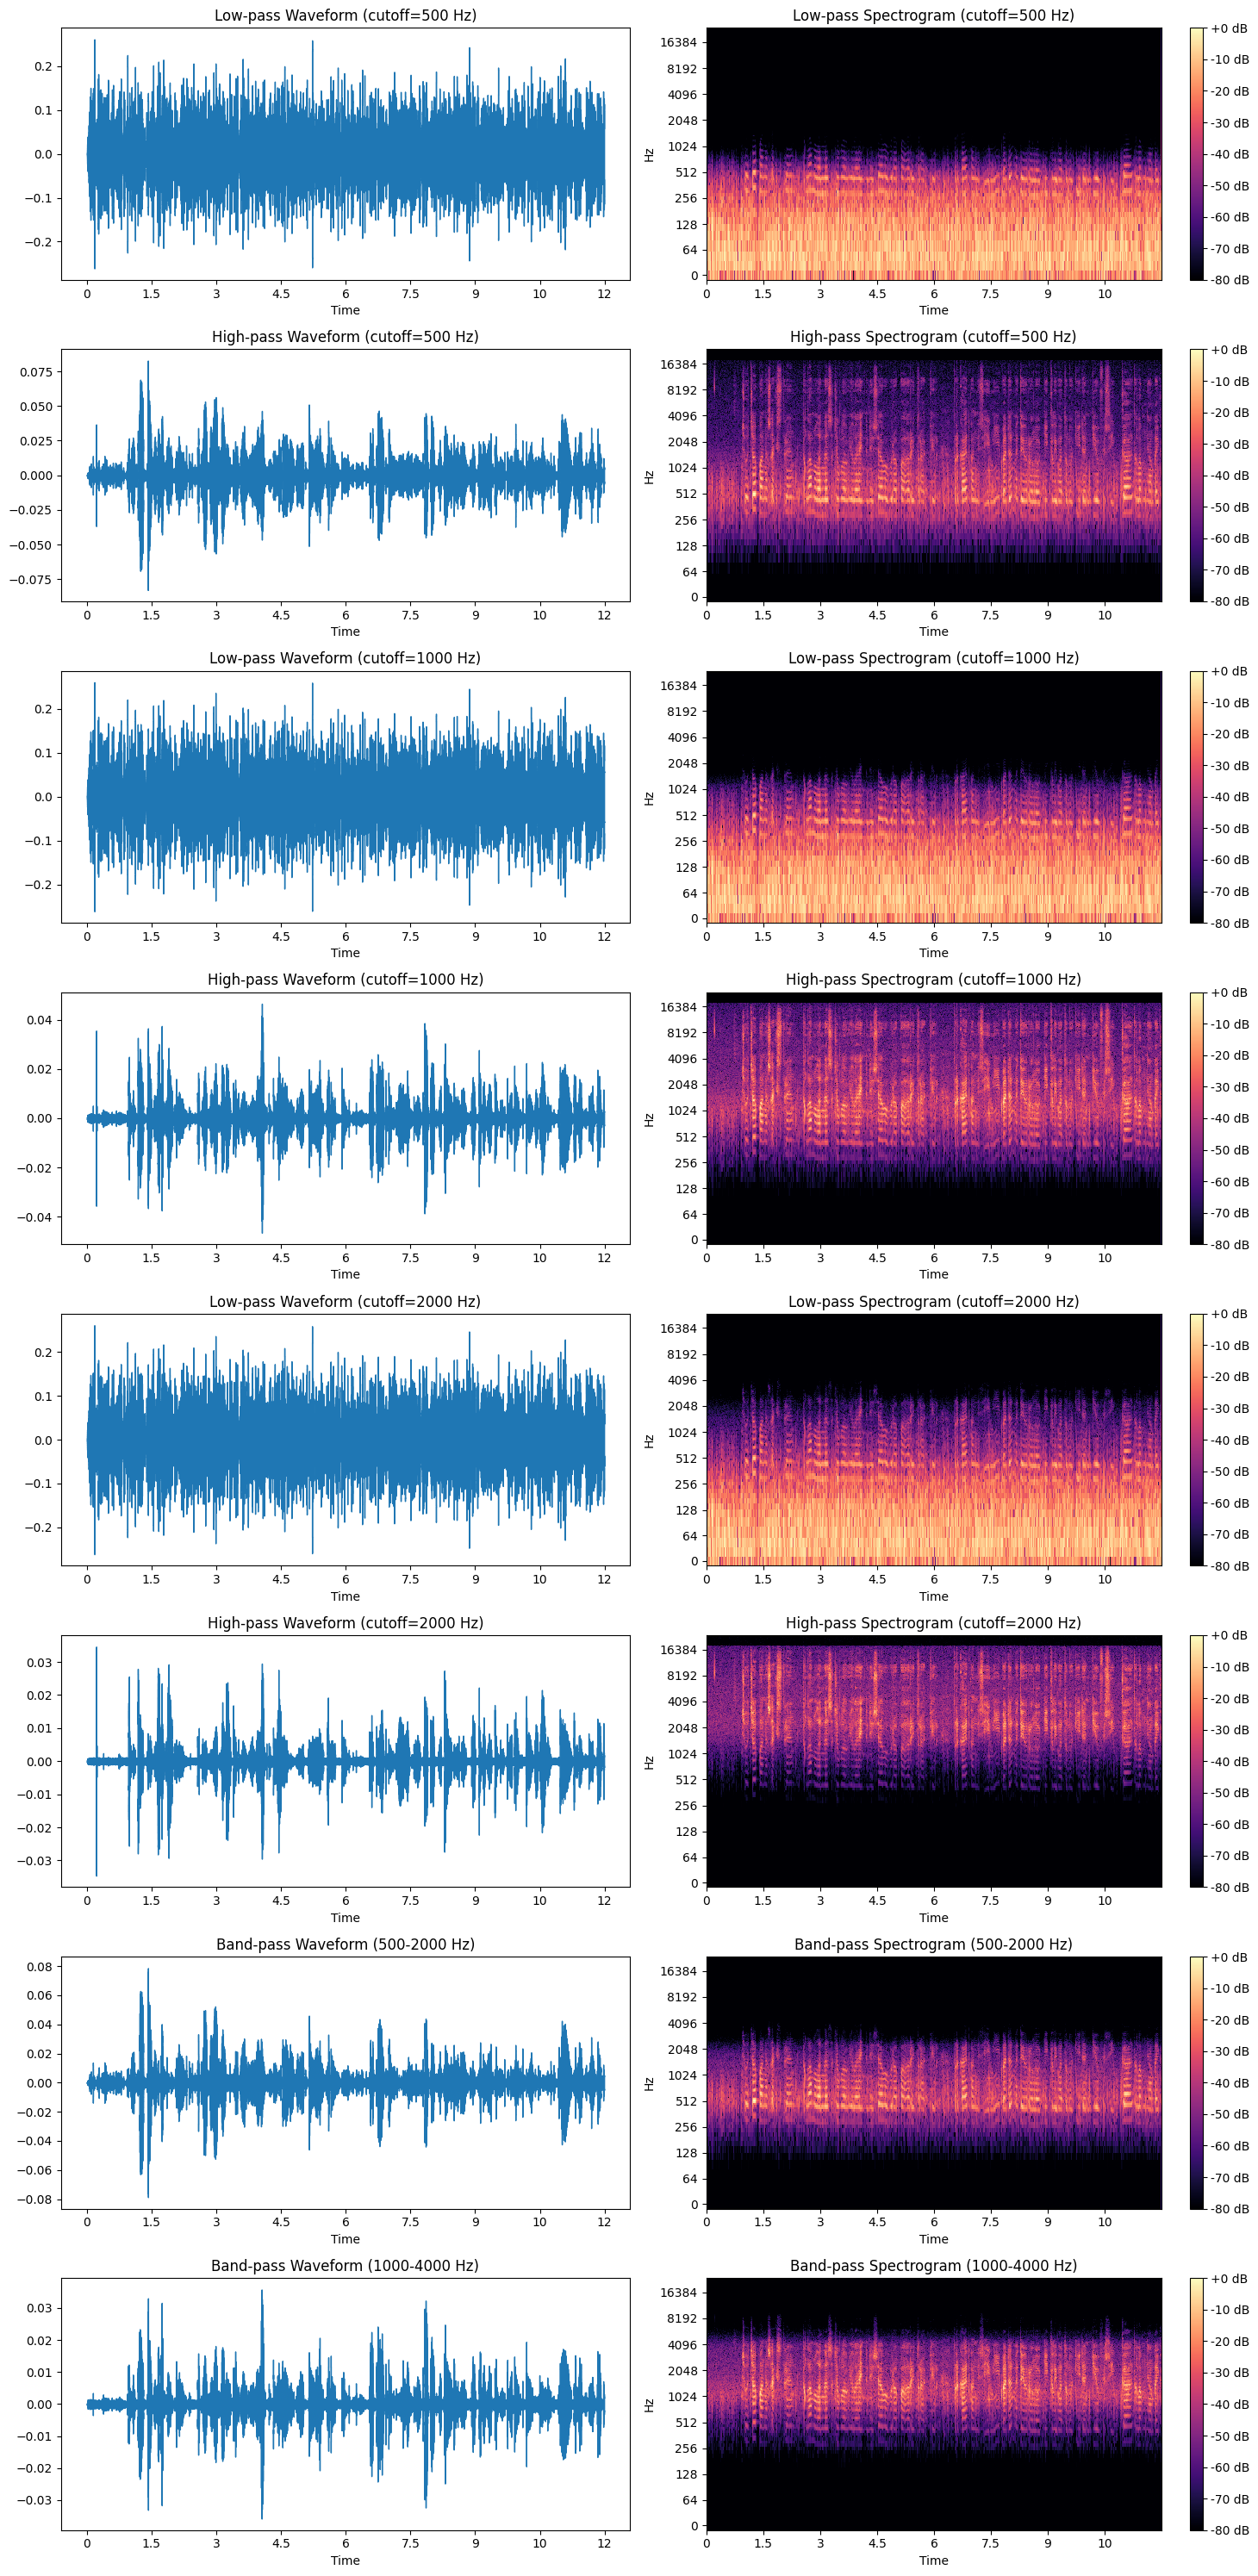

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter

file_path = os.path.join('data', 'audio_soal2.wav')
y, sr = librosa.load(file_path, sr=None)

def butter_filter(data, cutoff, sr, filter_type='low', order=5, band=None):
    nyq = 0.5 * sr
    if filter_type == 'band':
        low, high = band
        normal = [low / nyq, high / nyq]
        b, a = butter(order, normal, btype='band')
    else:
        normal = cutoff / nyq
        b, a = butter(order, normal, btype=filter_type)
    return lfilter(b, a, data)

cutoffs = [500, 1000, 2000]
filters = ['low', 'high']
bands = [(500, 2000), (1000, 4000)]

plt.figure(figsize=(15, 30))
plot_idx = 1

for cutoff in cutoffs:
    for f_type in filters:
        filtered = butter_filter(y, cutoff, sr, filter_type=f_type)
        out_filename = f'audio_{f_type}pass_{cutoff}Hz.wav'
        out_path = os.path.join('data', out_filename)
        sf.write(out_path, filtered, sr)

        plt.subplot(8, 2, plot_idx)
        librosa.display.waveshow(filtered, sr=sr)
        plt.title(f'{f_type.capitalize()}-pass Waveform (cutoff={cutoff} Hz)')
        plot_idx += 1

        S = librosa.amplitude_to_db(np.abs(librosa.stft(filtered)), ref=np.max)
        plt.subplot(8, 2, plot_idx)
        librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', cmap='magma')
        plt.title(f'{f_type.capitalize()}-pass Spectrogram (cutoff={cutoff} Hz)')
        plt.colorbar(format="%+2.0f dB")
        plot_idx += 1

for band in bands:
    filtered = butter_filter(y, None, sr, filter_type='band', band=band)
    out_filename = f'audio_bandpass_{band[0]}-{band[1]}Hz.wav'
    out_path = os.path.join('data', out_filename)
    sf.write(out_path, filtered, sr)

    plt.subplot(8, 2, plot_idx)
    librosa.display.waveshow(filtered, sr=sr)
    plt.title(f'Band-pass Waveform ({band[0]}-{band[1]} Hz)')
    plot_idx += 1

    S = librosa.amplitude_to_db(np.abs(librosa.stft(filtered)), ref=np.max)
    plt.subplot(8, 2, plot_idx)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.title(f'Band-pass Spectrogram ({band[0]}-{band[1]} Hz)')
    plt.colorbar(format="%+2.0f dB")
    plot_idx += 1

plt.tight_layout()
plt.show()


Penjelasan : 
Saat melakukan rekaman, noise yang muncul adalah suara dari kipas angin. Pada eksperimen ini, saya menggunakan 3 nilai untuk lowpass dan highpass yaitu 500, 1000 dan 2000Hz. Untuk bandpass saya menggunakan 500-2000Hz dan 1000-4000Hz. Filter yang paling efektif untuk mengurangi noise kipas angin ini menurut saya adalah highpass di 1000Hz dan bandpass di 1000-4000 Hz, saat menggunakan filter lowpass, suara saya malah mengecil dan suara kipas angin tidak terlalu terfilter. Pada bandpass 500-2000Hz dan highpass 500Hz, suara kipas berhasil terfilter tetapi tidak terlalu efektif dan masih cukup terdengar. Pada highpass 1000Hz, suara kipas angin sudah terfilter dan masih dapat terdengar tetapi sangat kecil, untuk bandpass 1000-4000Hz, suara kipas angin juga sama tetapi suara vokal saya menjadi seperti suara vokal di radio.

Kejelasan suara pada masing masing filter. Pada lowpass, suara saya menjadi terpendam dan kurang jelas ucapannya karena noise tidak terfilter secara efektif. Pada highpass, noise akan menghilang di bagian bawah tetapi masih terdengar dan untuk kejelasan suaranya semakin tinggi nilai highpass, semakin menyamar pelapalan ucapan. Pada bandpass, suara dan pelapan terdengar jelas dengan nilai yang pas, noise pun efektif terfilter di nilai 1000-4000Hz.

---

### Soal 3
- Lakukan pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengar seperti chipmunk (dengan mengubah pitch ke atas).
- Visualisasikan waveform dan spektrogram sebelum dan sesudah pitch shifting.
- Jelaskan proses pitch shifting yang Anda lakukan, termasuk:
    - Parameter yang digunakan
    - Perbedaan dalam representasi visual antara suara asli dan suara yang telah dimodifikasi
    - Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara
- Gunakan dua buat pitch tinggi, misalnya pitch +7 dan pitch +12.
- Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio. (Gunakan ChatGPT / AI untuk membantu Anda dalam proses ini)



Pitch-shifted audio saved to: data\audio_soal1_pitchshifted.wav


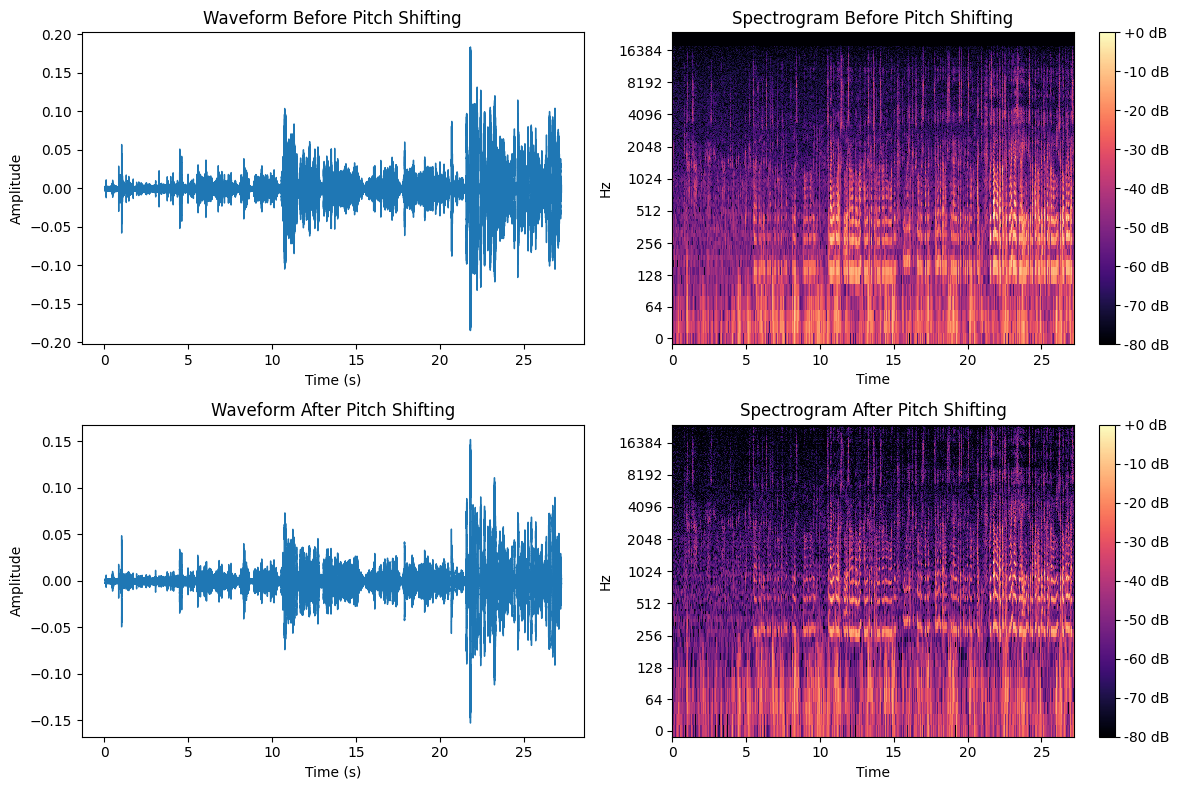

In [4]:
import librosa
import numpy as np
import os
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt

# Load audio
audio_file = os.path.join('data', 'audio_soal1.wav')
y, sr = librosa.load(audio_file, sr=None)

# (+12 semitones = naik satu oktaf)
y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

pitch_shifted_file = os.path.join('data', 'audio_soal1_pitchshifted.wav')
sf.write(pitch_shifted_file, y_pitch_shifted, sr)
print(f"Pitch-shifted audio saved to: {pitch_shifted_file}")

# ===== VISUALIZATION =====
plt.figure(figsize=(12, 8))

# Waveform before pitch shifting
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Before Pitch Shifting')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Spectrogram before pitch shifting
plt.subplot(2, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Before Pitch Shifting')

# Waveform after pitch shifting
plt.subplot(2, 2, 3)
librosa.display.waveshow(y_pitch_shifted, sr=sr)
plt.title('Waveform After Pitch Shifting')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Spectrogram after pitch shifting
plt.subplot(2, 2, 4)
D_pitch_shifted = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_shifted)), ref=np.max)
librosa.display.specshow(D_pitch_shifted, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram After Pitch Shifting')

plt.tight_layout()
plt.show()


Penjelasan : Parameter yang digunakan pada pitch shifting di sini ada beberapa, yang pertama adalah y yaitu array numpy yang isinya sinyal audio. Ada juga sr, yaitu sample rate dari audio, dan ada n_steps = 12, n_steps memakai satuan semitones atau nada dalam tangga nada. 12 semitone sama dengan 1 oktaf yang artinya naik 1 oktaf. Di eksperimen pitchnya naik, jika ingin menurunkan pitch nilai n_steps dijadikan negatif. 

Visualisasi kedua audio memiliki perbedaan yang dapat dilihat. Waveform pada audio asli periode lebih merata frekuensinya, pada waveform audio yang pitchnya dinaikkan, gelombangnya lebih padat (rapat) karena pitch shifting naik menaikkan frekuensi, di mana frekuensi tinggi lebih banyak lipatan/gelombang. Pada spektogram, Warna terang terlihat tersebar di frekuensi vokal dasar sekitar 128 sampai 2000 an Hz. Pada spektogram audio pitch shifting, semua frekuensi bergeser ke atas, jadinya warna yang tadinya terang menjadi sedikit lebih gelap dan tersebar ke atas, pola bentuk keduanya masih sama.

Kualitas suara, saat melakukan pitch naik, suara vokal juga akan ikut naik (nadanya). Suaranya akan menjadi lebih ringan dan tidak alami, seperti karakter kartun. Kejelasan suara menurun karena vokal frekuensi rendahnya memudar.

Pitch-shifted (+7) saved to: data\audio_soal1_pitchshifted_+7.wav
Pitch-shifted (+12) saved to: data\audio_soal1_pitchshifted_+12.wav


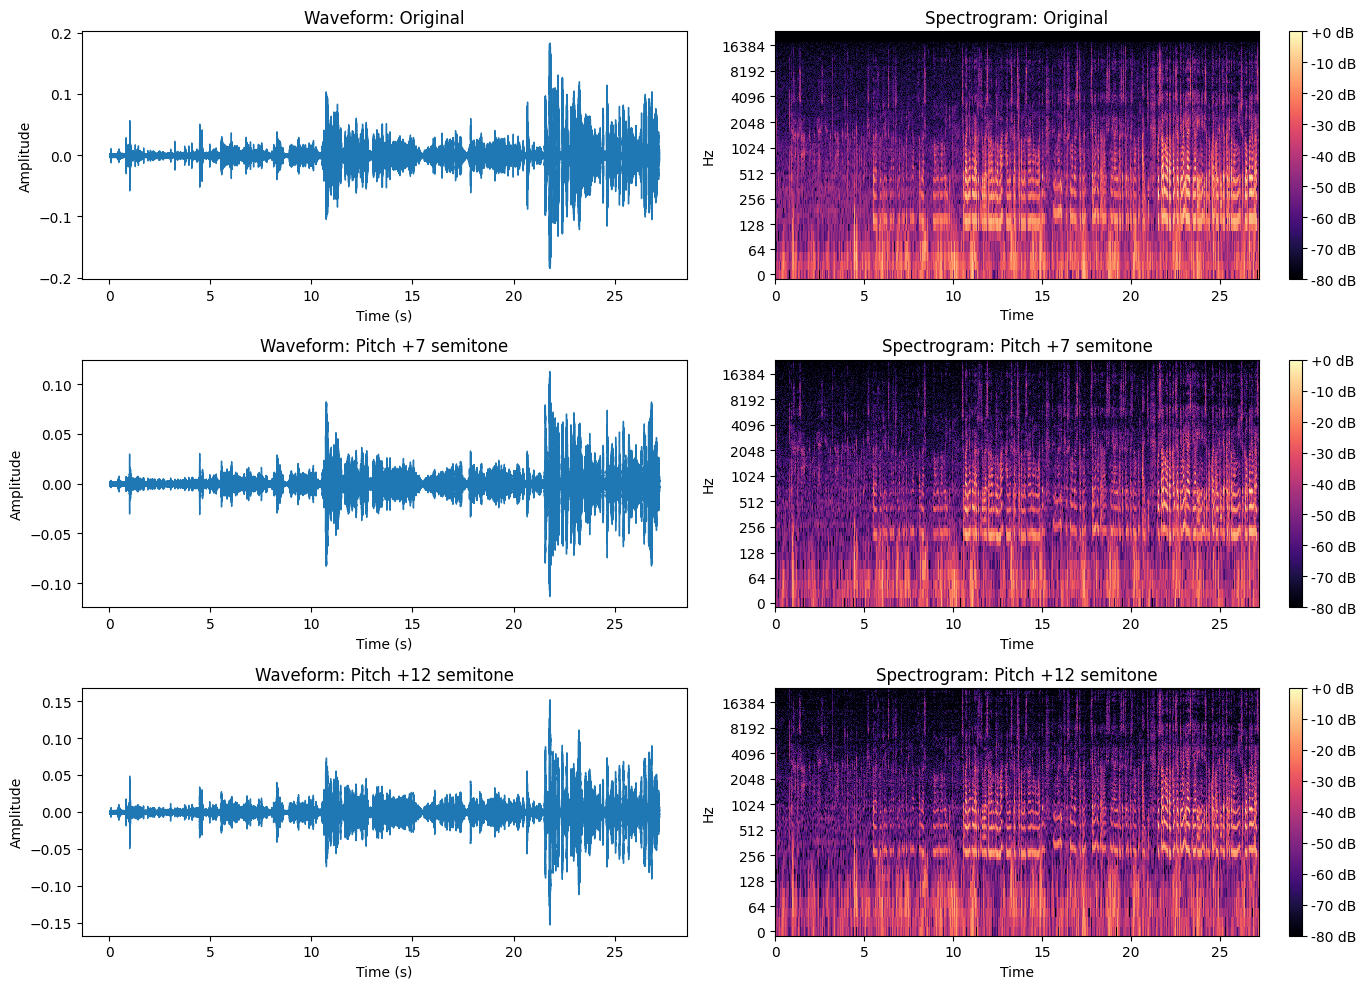

In [5]:
import librosa
import numpy as np
import os
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt

audio_file = os.path.join('data', 'audio_soal1.wav')
y, sr = librosa.load(audio_file, sr=None)

y_pitch_7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch_12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

pitch_7_file = os.path.join('data', 'audio_soal1_pitchshifted_+7.wav')
pitch_12_file = os.path.join('data', 'audio_soal1_pitchshifted_+12.wav')

sf.write(pitch_7_file, y_pitch_7, sr)
sf.write(pitch_12_file, y_pitch_12, sr)

print(f"Pitch-shifted (+7) saved to: {pitch_7_file}")
print(f"Pitch-shifted (+12) saved to: {pitch_12_file}")

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform: Original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: Original')

plt.subplot(3, 2, 3)
librosa.display.waveshow(y_pitch_7, sr=sr)
plt.title('Waveform: Pitch +7 semitone')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
D7 = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_7)), ref=np.max)
librosa.display.specshow(D7, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: Pitch +7 semitone')

plt.subplot(3, 2, 5)
librosa.display.waveshow(y_pitch_12, sr=sr)
plt.title('Waveform: Pitch +12 semitone')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 6)
D12 = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_12)), ref=np.max)
librosa.display.specshow(D12, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: Pitch +12 semitone')

plt.tight_layout()
plt.show()


In [6]:
import soundfile as sf
import numpy as np
import os

pitch_7_file = os.path.join('data', 'audio_soal1_pitchshifted_+7.wav')
pitch_12_file = os.path.join('data', 'audio_soal1_pitchshifted_+12.wav')
combined_file = os.path.join('data', 'audio_soal1_pitchshifted_combined.wav')

y7, sr7 = sf.read(pitch_7_file)
y12, sr12 = sf.read(pitch_12_file)

if sr7 != sr12:
    raise ValueError("Sample rates do not match.")

y_combined = np.concatenate((y7, y12))
sf.write(combined_file, y_combined, sr7)

print(f"Combined file saved to: {combined_file}")

Combined file saved to: data\audio_soal1_pitchshifted_combined.wav


---

### Soal 4
- Lakukan processing pada rekaman yang sudah di-pitch shift pada Soal 3 dengan tahapan:
    - Equalizer
    - gain/fade
    - Normalization
    - Compression
    - Noise Gate
    - Silence trimming
- Atur nilai target loudness ke -16 LUFS.
- Visualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.
- Jelaskan:
    - Perubahan dinamika suara yang terjadi
    - Perbedaan antara normalisasi peak dan normalisasi LUFS
    - Bagaimana kualitas suara berubah setelah proses normalisasi dan loudness optimization
    - Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara

✅ File hasil disimpan di: data\audio_soal1_processed.wav


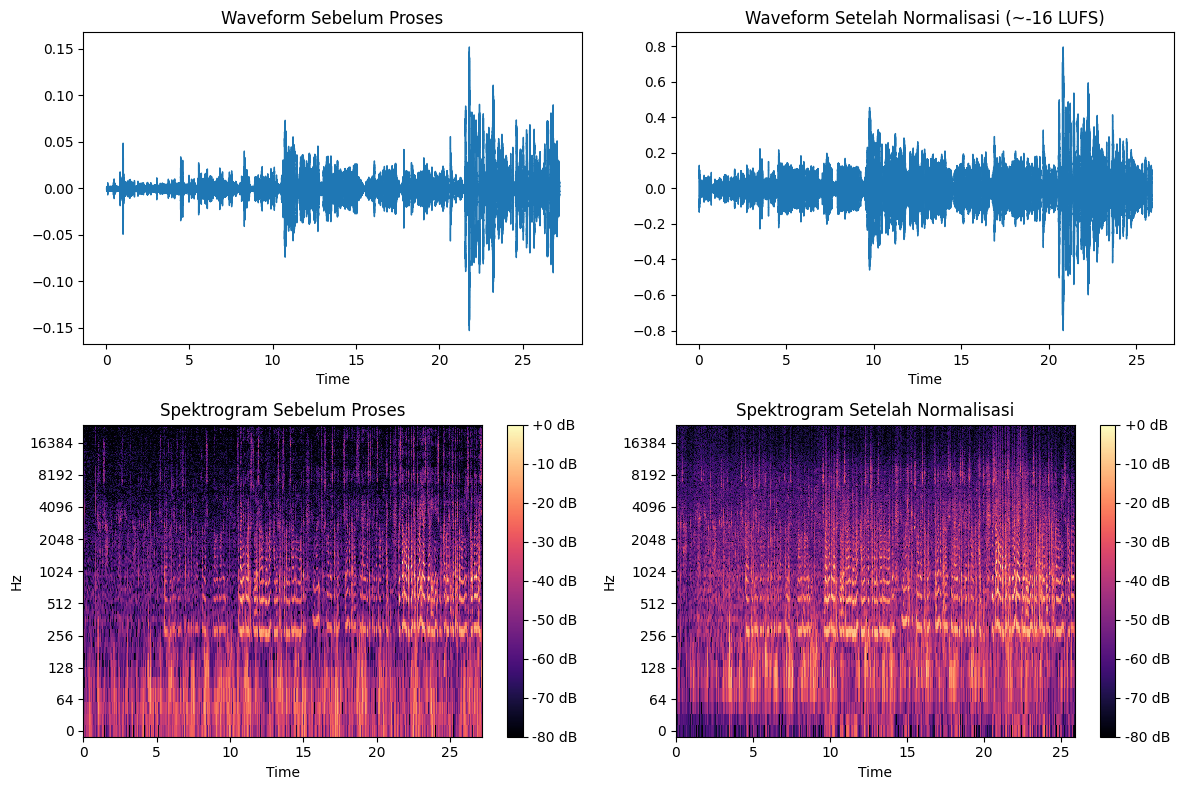

In [7]:
import os
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# === Path setup ===
input_path = os.path.join('data', 'audio_soal1_pitchshifted.wav')
output_path = os.path.join('data', "audio_soal1_processed.wav")

# === Load audio ===
y, sr = librosa.load(input_path, sr=None)
original_y = y.copy()

# === 1. Equalizer (contoh sederhana: band-pass 100Hz–10kHz) ===
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)

y = bandpass_filter(y, 100, 10000, sr)

# === 2. Gain/Fade ===
fade_in_time = 3  # detik
fade_out_time = 3
fade_in_samples = int(sr * fade_in_time)
fade_out_samples = int(sr * fade_out_time)

fade_in = np.linspace(0.0, 1.0, fade_in_samples)
fade_out = np.linspace(1.0, 0.0, fade_out_samples)

y[:fade_in_samples] *= fade_in
y[-fade_out_samples:] *= fade_out

# === 3. Normalisasi ke -16 LUFS ===
def normalize_lufs(signal, target_lufs=-16.0):
    rms = np.sqrt(np.mean(signal**2))
    current_lufs = 20 * np.log10(rms) if rms > 0 else -np.inf
    gain_db = target_lufs - current_lufs
    gain = 10 ** (gain_db / 20)
    return signal * gain
y = normalize_lufs(y, target_lufs=-16.0)

# === 4. Compression (simple hard knee) ===
def simple_compressor(signal, threshold_db=-20.0, ratio=4.0):
    threshold = 10 ** (threshold_db / 20)
    compressed_signal = np.copy(signal)
    for i in range(len(signal)):
        if abs(signal[i]) > threshold:
            excess = abs(signal[i]) - threshold
            compressed_excess = excess / ratio
            compressed_signal[i] = np.sign(signal[i]) * (threshold + compressed_excess)
    return compressed_signal
y = simple_compressor(y, threshold_db=-20.0, ratio=4.0)

# === 5. Noise Gate ===
def noise_gate(signal, threshold_db=-40.0):
    threshold = 10 ** (threshold_db / 20)
    gated_signal = np.where(np.abs(signal) < threshold, 0, signal)
    return gated_signal
y = noise_gate(y, threshold_db=-40.0)

# === Silence Trimming ===
y, _ = librosa.effects.trim(y, top_db=20)

# === Save hasil ===
sf.write(output_path, y, sr)
print(f"✅ File hasil disimpan di: {output_path}")

# === 7. Visualisasi ===
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Waveform sebelum normalisasi
librosa.display.waveshow(original_y, sr=sr, ax=axs[0,0])
axs[0,0].set_title("Waveform Sebelum Proses")

# Waveform sesudah normalisasi
librosa.display.waveshow(y, sr=sr, ax=axs[0,1])
axs[0,1].set_title("Waveform Setelah Normalisasi (~-16 LUFS)")

# Spektrogram sebelum
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(original_y)), ref=np.max)
img1 = librosa.display.specshow(D1, sr=sr, x_axis='time', y_axis='log', ax=axs[1,0])
axs[1,0].set_title("Spektrogram Sebelum Proses")
fig.colorbar(img1, ax=axs[1,0], format="%+2.f dB")

# Spektrogram sesudah
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img2 = librosa.display.specshow(D2, sr=sr, x_axis='time', y_axis='log', ax=axs[1,1])
axs[1,1].set_title("Spektrogram Setelah Normalisasi")
fig.colorbar(img2, ax=axs[1,1], format="%+2.f dB")

plt.tight_layout()
plt.show()


Penjelasan : 
Perubahan dinamika suara yang terjadi, suara terdengar lebih stabil dari awal sampai akhir meskipun terdapat bagian bagian yang kurang smooth (agak pecah dan noise kresek kresek), harus disesuaikan lagi untuk parameter yang dipakai dalam processing. Suara juga terdengar pecah, kasar di beberapa bagian karena distorsi.

Normalisasi peak digunakan untuk menyamakan puncak puncak volume/amplitudo, jadi hanya menyesuaikan bagian bagian yang melewati threshold, tidak pasti membuat volume terdengar seimbang. Normalisasi LUFS menyesuaikan rata rata nilai setiap bagian, jadinya lebih stabil untuk nilai amplitudonya.

Kualitas suara setelah optimasi, suaranya lebih keras dan lebih jelas. Suaranya lebih datar (suara berbisik dan suara keras sama). Namun noise di frekuensi yang sama dengan vokal susah untuk dihilangkan jadi menyebabkan noise tidak hilang sepenuhnya dan masih dapat terdengar sekeras vokal.

Kelebihan kekurangan Loudness optimization, kelebihannya volume di setiap bagian lebih konsisten, tidak perlu menyesuaikan volume lagi. Kekurangannya mungkin di beberapa skenario jadi kurang natural, misalnya audio berbisik langsung berubah ke audio berteriak, keduanya akan terdengar di volume yang sama kalau dilakukan optimasi ini. Kekurangan lainnya yaitu distorsi, jadinya suara terdengar pecah.

---

### Soal 5
- Pilih 2 buah (potongan) lagu yang memiliki vokal (penyanyi) dan berdurasi sekitar 1 menit:
    - Lagu 1: Nuansa sedih, lambat
    - Lagu 2: Nuansa ceria, cepat
- Konversikan ke format WAV sebelum dimuat ke notebook ini.
- Lakukan deteksi tempo (BPM) dan estimasi kunci (key) dari masing-masing lagu dan berikan analisis singkat.
- Lakukan remix terhadap kedua lagu:
    - **Time Stretch**: Samakan tempo kedua lagu 
    - **Pitch Shift**: Samakan kunci (key) kedua lagu
    - **Crossfading**: Gabungkan kedua lagu dengan efek crossfading
    - **Filter Tambahan**: Tambahkan filter kreatif sesuai keinginan (opsional)
- Jelaskan proses dan parameter yang digunakan
- Tampilkan waveform dan spektrogram sesudah remix
- Jelaskan hasil remix yang telah dilakukan

In [39]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

lagu1_path = os.path.join('data', 'lagu1.wav')
lagu2_path = os.path.join('data', 'lagu2.wav')

# === Fungsi bantu: deteksi tempo dan estimasi kunci ===
def analyze_audio(filepath):
    y, sr = librosa.load(filepath, sr=None)
    
    # ---- 1. Deteksi Tempo (BPM) ----
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    if isinstance(tempo, np.ndarray):  # pastikan scalar
        tempo = float(tempo[0]) if tempo.size > 0 else 0.0
    else:
        tempo = float(tempo)
    
    # ---- 2. Estimasi Kunci (Key) ----
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    
    # Template referensi mayor/minor (24 total)
    maj_profile = np.array([6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 
                            2.52, 5.19, 2.39, 3.66, 2.29, 2.88])
    min_profile = np.array([6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 
                            2.54, 4.75, 3.98, 2.69, 3.34, 3.17])
    
    corr_major = [np.corrcoef(np.roll(maj_profile, i), chroma_mean)[0, 1] for i in range(12)]
    corr_minor = [np.corrcoef(np.roll(min_profile, i), chroma_mean)[0, 1] for i in range(12)]
    
    max_major = np.argmax(corr_major)
    max_minor = np.argmax(corr_minor)
    
    if max(corr_major) > max(corr_minor):
        key_name = librosa.midi_to_note(12 + max_major)
        mode = "Major"
    else:
        key_name = librosa.midi_to_note(12 + max_minor)
        mode = "Minor"
    
    key_estimate = f"{key_name} {mode}"
    
    return tempo, key_estimate

# === Analisis Lagu 1 ===
tempo1, key1 = analyze_audio(lagu1_path)
print(f"Lagu 1 (Sedih, Lambat):")
print(f"- Tempo: {tempo1:.2f} BPM")
print(f"- Estimasi Kunci: {key1}\n")

# === Analisis Lagu 2 ===
tempo2, key2 = analyze_audio(lagu2_path)
print(f"Lagu 2 (Ceria, Cepat):")
print(f"- Tempo: {tempo2:.2f} BPM")
print(f"- Estimasi Kunci: {key2}\n")


Lagu 1 (Sedih, Lambat):
- Tempo: 97.51 BPM
- Estimasi Kunci: F0 Major

Lagu 2 (Ceria, Cepat):
- Tempo: 132.51 BPM
- Estimasi Kunci: D0 Major



Analisis singkat, Lagu1 terdeteksi temponya 97 BPM dengan estimasi kunci F0 Major. Lagu2 terdeteksi temponya 132 BPM dengan estimasi kunci D major.

tempo dihitung dengan analisis beat tracking dari pola ketukan audio, kunci diestimasikan menggunakan chroma featur yang dibandingkan dengan profil nada major minor.

In [40]:
import librosa, soundfile as sf, os

# Load kedua lagu
song1_path = os.path.join('data', 'lagu1.wav')
song2_path = os.path.join('data', 'lagu2.wav')

y1, sr1 = librosa.load(song1_path, sr=None)
y2, sr2 = librosa.load(song2_path, sr=None)

# Estimasi tempo
tempo1, _ = librosa.beat.beat_track(y=y1, sr=sr1)
tempo2, _ = librosa.beat.beat_track(y=y2, sr=sr2)

# Konversi ke float
tempo1 = float(tempo1)
tempo2 = float(tempo2)

# Samakan tempo lagu pertama ke tempo lagu kedua
rate_ratio = tempo2 / tempo1
y1_stretched = librosa.effects.time_stretch(y1, rate=rate_ratio)
y1_pitch = librosa.effects.pitch_shift(y1_stretched, sr=sr1, n_steps=2)
sf.write(os.path.join('data', 'lagu1_pitch.wav'), y1_pitch, sr1)
print("✅ Tempo lagu pertama sekarang sama dengan lagu kedua.")


C:\Users\SasaLele\AppData\Local\Temp\ipykernel_21704\3371286270.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo1 = float(tempo1)
C:\Users\SasaLele\AppData\Local\Temp\ipykernel_21704\3371286270.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo2 = float(tempo2)


✅ Tempo lagu pertama sekarang sama dengan lagu kedua.


In [41]:
import librosa
import soundfile as sf
import numpy as np
import os

# ===== Load kedua lagu =====
song1_path = os.path.join('data', 'lagu1_pitch.wav')
song2_path = os.path.join('data', 'lagu2.wav')

y1, sr1 = librosa.load(song1_path, sr=None)
y2, sr2 = librosa.load(song2_path, sr=None)

# Pastikan sampling rate sama
if sr1 != sr2:
    print("⚠️ Sampling rate berbeda, gunakan yang pertama")
    y2 = librosa.resample(y2, orig_sr=sr2, target_sr=sr1)
    sr = sr1
else:
    sr = sr1

# ===== Tentukan durasi crossfade =====
crossfade_duration = 5.0  # detik
crossfade_samples = int(sr * crossfade_duration)

# Pastikan cukup panjang
if len(y1) < crossfade_samples or len(y2) < crossfade_samples:
    raise ValueError("❌ Lagu terlalu pendek untuk durasi crossfade ini.")

# ===== Buat window fade =====
fade_out = np.linspace(1.0, 0.0, crossfade_samples)
fade_in  = np.linspace(0.0, 1.0, crossfade_samples)

# ===== Ambil segmen crossfade =====
y1_end = y1[-crossfade_samples:] * fade_out
y2_start = y2[:crossfade_samples] * fade_in

# ===== Gabungkan hasil crossfade =====
crossfade_mix = y1_end + y2_start

# Hasil akhir: [lagu1 tanpa akhir] + [crossfade_mix] + [lagu2 tanpa awal]
y_final = np.concatenate((y1[:-crossfade_samples], crossfade_mix, y2[crossfade_samples:]))

# ===== Simpan hasil =====
output_path = os.path.join('data', 'remix_crossfade.wav')
sf.write(output_path, y_final, sr)
print(f"✅ Crossfade selesai! File disimpan di: {output_path}")


✅ Crossfade selesai! File disimpan di: data\remix_crossfade.wav


Penjelasan : Proses yang dilakukan untuk melakukan remix ini yang pertama membuat tempo kedua lagu menjadi sama, di eksperimen ini lagu1 temponya diubah menyamakan tempo lagu2. Setelah itu, lagu1 juga diubah pitchnya, menjadikan kunci kedua lagu ini sama. 

Parameter yang digunakan, di awal load file audio menjadi y1 sr1 dan y2 sr2. y adalah array amplitudo sinyal masing masing lagu dan sr adalah sample rate.

Lalu pada estimasi tempo, ada tempo1 dan tempo2 yang fungsinya untuk menyimpan tempo hasil dari funsgi librosa. Variable _ juga aslinya digunakan untuk menyimpan indeks beat frames tapi tidak digunakan.
Hitung rasio tempo antar lagu untuk menentukan seberapa besar perubahan tempo supaya lagu pertama punya tempo yang sama dengan lagu kedua.

Pengubahan tempo lagu pertama memakai parameter y yaitu sinyal audio yang ingin diubah temponya (di sini y1), rate untuk rasio perubahan tempo (yang tadi sudah dihitung) logikanya tempo2 > tempo1 maka lagu pertama akan dipercepat.

Ubah pitch ada parameter yaitu sample rate lagu1, n_steps yaitu jumlah semitone pergeseran pitch (di sini dinaikkan dua semitone).

Setelah sama, ,lagu kemudian di gabungkan dengan efek crossfade untuk transisi yang lebih smooth. Di sini dicek terlebih dahulu, sample rate nya sama atau tidak, kalau beda akan digunakan yang pertama. Ada juga parameter yaitu crossfade_duration untuk menentukan durasi efek dalam detik dan jumlah sample pada crossfade.

fade_in fade_out digunakan untuk membuat kurva perubahan volume pada crossfade, di sini isinya deret nilai dari awal ke akhir bertahap. y1_end dan y2_start dipakai untuk mengambil bagian akhir dan awal dari lagu pertama dan lagu kedua untuk dibuat overlap (menimpa).

Penggabungan hasil memakai concatenate numpy dengan menyatukan ketiga bagian yaitu lagu1 tanpa bagian akhir, campuran crossfade dan lagu2 tanpa bagian awal.

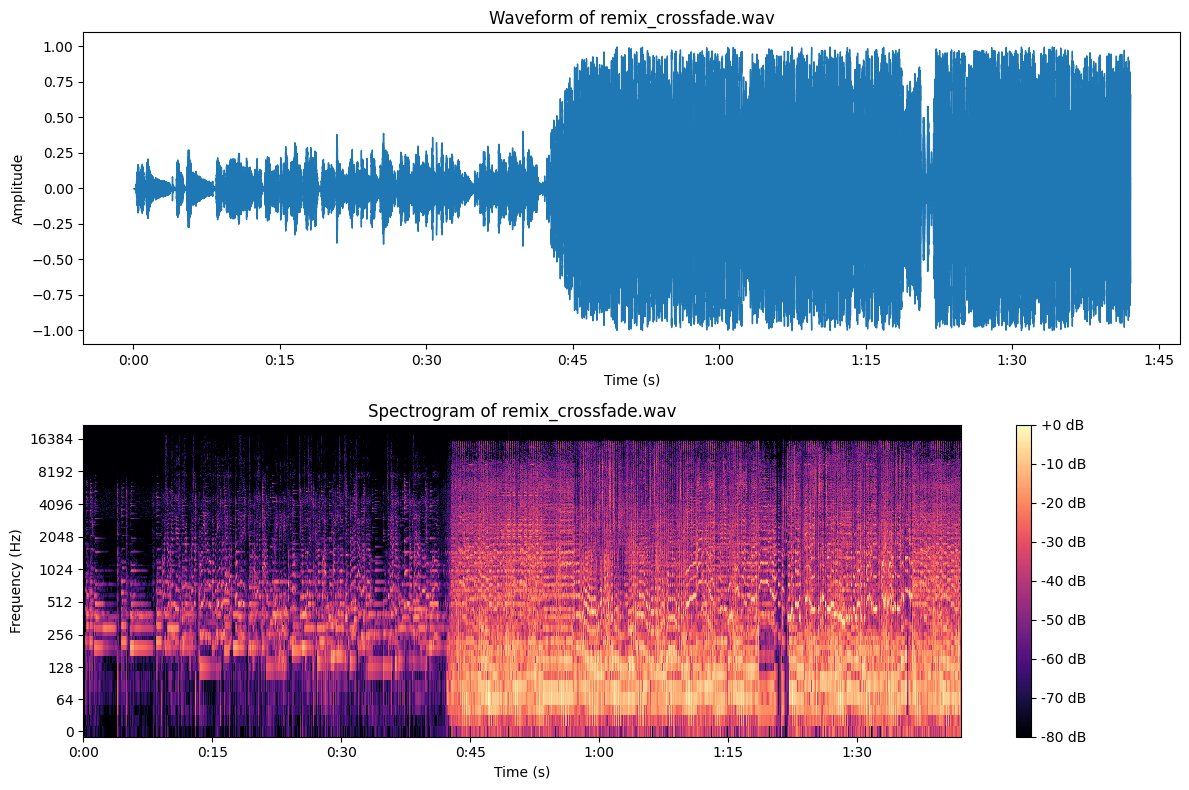

In [42]:
import librosa
import numpy as np
import os

import librosa.display
import matplotlib.pyplot as plt

# Load the remix_crossfade.wav file
remix_file = os.path.join('data', 'remix_crossfade.wav')
y_remix, sr_remix = librosa.load(remix_file, sr=None)

# Plot waveform
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_remix, sr=sr_remix)
plt.title('Waveform of remix_crossfade.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute and plot spectrogram
plt.subplot(2, 1, 2)
D_remix = librosa.amplitude_to_db(np.abs(librosa.stft(y_remix)), ref=np.max)
librosa.display.specshow(D_remix, sr=sr_remix, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of remix_crossfade.wav')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

Remix dilakukan dengan menyamakan tempo dan kunci nada dua lagu, lalu menggabungkannya menggunakan efek crossfade agar transisinya halus. Tempo lagu pertama diubah sesuai tempo lagu kedua menggunakan rasio perbandingan tempo, kemudian pitch lagu pertama dinaikkan dua semitone agar kunci nadanya sama. Setelah itu dilakukan pengecekan sample rate untuk memastikan keduanya sinkron, lalu ditentukan durasi crossfade yang mengatur panjang transisi antar lagu. Efek fade in dan fade out diterapkan agar volume lagu pertama perlahan menurun sementara lagu kedua meningkat. Terakhir, ketiga bagian lagu pertama tanpa bagian akhir, campuran crossfade, dan lagu kedua tanpa bagian awal digabung menjadi satu file remix.

Referensi : 
[ChatGPT](https://chatgpt.com/share/68f256c7-89cc-8001-8264-ad0d6fd1307c)   
[SciPy lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter)    
[SciPy butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)   
[Rex Orange County - “A Song About Being Sad” (Official Audio)](https://www.youtube.com/watch?v=9oRyFXSq2l4&list=RD9oRyFXSq2l4&start_radio=1)   
[John Michael Howell - Happy Song [Official Music Video]](https://www.youtube.com/watch?v=tA_8lWrmkSU&list=RDtA_8lWrmkSU&start_radio=1)   